## Sparse Inverse Covariance Estimation


$$\min_{X\in\mathbb{R}^{n\times n}, X\succeq 0} \langle S, X\rangle - \log\det(X) + \alpha\|X\|_1$$

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import autograd.numpy as np
import autograd

In [18]:
def func(S, X, alpha = 0.15):
    return np.trace(S.T.dot(X)) - np.log(np.linalg.det(X)) + alpha*np.sum(np.abs(X))

In [23]:
n = 6
A = np.random.normal(0,1,(n,n))
S = A.dot(A.T)
gradient = autograd.grad(lambda X : func(S, X))
objective = lambda X: func(S, X)

In [24]:
####     Projection onto positive semidefinite cone

def project(X):
    esp, A = np.linalg.eig(X)
    esp[esp<0] = 0.0
    return A.dot(np.diag(esp).dot(A.T))

def proj_grad_des(start, iters, grad):
    points = [start]
    for ite in iters:
        points.append(project(points[-1]-ite*grad(points[-1])))
        
    return points

In [25]:

def graph_plt(val):
    plt.figure(figsize=(5, 5))
    plt.xlabel('Step')
    plt.ylabel('Error')
    plt.yscale('log')
    plt.plot(range(len(val)), val, linewidth=3.0)

/home/naman/miniconda3/lib/python3.5/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)


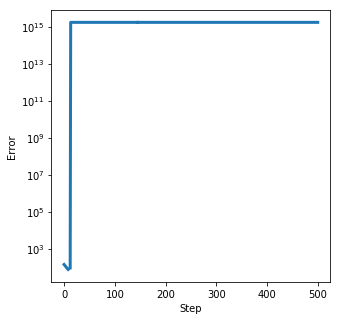

In [27]:
A0 = np.random.normal(0, 1, (n,n))
X0 = A0.dot(A0.T)
Xs = proj_grad_des(X0, [0.02]*200, gradient)
graph_plt([objective(X) for X in Xs])